In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# tensorflow 1.x examples 실습

In [4]:
# [털, 날개], [hair, wing]
x_data = np.array([ [0,0], [1,0], [1,1], [0,0], [0,0], [0,1] ])
#  y                기타   포유류 조류   기타   기타   조류

In [5]:
# [기타, 포유류, 조류], [etc, mammalia, birds]
y_data = np.array([
    [1,0,0], [0,1,0], [0,0,1], [1,0,0], [1,0,0], [0,0,1]
])

In [6]:
X = tf.placeholder(tf.float32)

In [7]:
Y = tf.placeholder(tf.float32)

In [8]:
#가중치, -1부터 1까지 랜덤 수
W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.)) # [특성_수, 뉴런_수]

In [9]:
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))  # [들어오는_수, 나가는_수]

In [10]:
b1 = tf.Variable(tf.zeros([10])) #W1에 해당하는 것

In [11]:
b2 = tf.Variable(tf.zeros([3]))

In [12]:
L1=tf.add(tf.matmul(X,W1),b1) #X*W1+b1, 실제 계산할 때는 X먼저 씀
#그냥 곱하기를 쓰면 안되나? 행렬곱을 써야 해서 이걸 써야 한다.

In [13]:
L1=tf.nn.relu(L1) #여기 나온 L1이 relu 통과해서 L1으로 리턴. tenserflow는 한땀한땀 공식

In [14]:
#마지막에 쓰는 애는 L2 대신 model을 쓴다.
model=tf.add(tf.matmul(L1,W2),b2)

In [15]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=model))
#      평균                  케라스에서 compile부분

In [16]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
#optimizer='어쩌구'

In [17]:
train_op=optimizer.minimize(cost)  #훈련

In [18]:
sess=tf.Session()

In [19]:
#변수들을 초기화
sess.run(tf.global_variables_initializer())

In [20]:
#직접 반복문돌며 훈련하기
for step in range(100): #epochs에 해당하는것
    sess.run(train_op,feed_dict={X:x_data, Y:y_data})
    #10번에 한번 비용 출력
    if (step+1) %10==0: # 10의 배수
        print(step+1,sess.run(cost,feed_dict={X:x_data, Y:y_data}))
        #                          사전을제공하다

10 0.7715113
20 0.6065162
30 0.48903814
40 0.40335524
50 0.3384979
60 0.28622624
70 0.24545006
80 0.21242446
90 0.18577993
100 0.16432022


In [21]:
prediction=tf.argmax(model, axis=1)

In [22]:
target=tf.argmax(Y,axis=1)

In [23]:
print('예측값:',sess.run(prediction,feed_dict={X:x_data}))
# 원 핫 인코딩에서 [소, 대, 중] 이면 대인 두번째 값1이 리턴된다.

예측값: [0 1 2 0 0 2]


In [24]:
print('실제값:', sess.run(target,feed_dict={Y:y_data}))
#정답은 그냥 정답 [대,0,0] 이니까 그냥 그 숫자

실제값: [0 1 2 0 0 2]


In [25]:
is_correct=tf.equal(prediction,target)

In [26]:
#케라스에서는 evaluate. 실제값과 예측값의 비교.[T,T,T,T,T,T]
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
#                                        [1,1,1,1,1,1]
# 1.0을 6번 더해서 6으로 나눔 -> 100퍼센트

In [27]:
print('정확도:{:.2f}%'.format(sess.run(accuracy*100,feed_dict={X:x_data,Y:y_data})))

정확도:100.00%


In [28]:
sess.close()

# tensorflow DNN처리

In [103]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [104]:
mnist=input_data.read_data_sets('mnist/data',one_hot=True) #저장할 장소 결정

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [105]:
X=tf.placeholder(tf.float32,[None,784])
#                   자료형 지정,[갯수 지정 안함, 2차원 데이터를 1차원으로 핌]

In [106]:
Y=tf.placeholder(tf.float32,[None,10])
#                               10칸에 0000001000 이런식으로 되어있음

In [107]:
#층을 4개 만들자
#3개로 가중치를 만들기
W1=tf.Variable(tf.random_normal([784,256],stddev=0.01))
#                  정규분포 난수 발생시켜 초기화     표준 편차

In [108]:
L1=tf.nn.relu(tf.matmul(X,W1)) #b는 그냥 생략
#케라스 손글씨 처리에서 model.add(Dense(256,activation='relu')),input_shape=(784,)))

In [109]:
#가중치 W2
W2=tf.Variable(tf.random_normal([256,256],stddev=0.01))

In [110]:
L2=tf.nn.relu(tf.matmul(L1,W2))
#케라스 손글씨 처리에서 model.add(Dense(256,activation='relu'))

In [111]:
W3=tf.Variable(tf.random_normal([256,10],stddev=0.01))
#                               256이 들어와서 최종적으로 10개, 표편0.01

In [112]:
model=tf.matmul(L2,W3)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
#model.add(Dense(10,activation='softmax'))

In [113]:
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)
#model.compile(loss='sparse_categorical_crossentropy',
#             optimizer='adam',metrics=['accuracy'])

In [114]:
#초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [115]:
mnist.train.num_examples

55000

In [116]:
#케라스에서 배치 싸이즈 구하는 것을 여기에서는 직접
batch_size=100 #이미지 100개 가져와서 처리하겠다.
total_batch=int(mnist.train.num_examples/batch_size)

In [117]:
total_batch #55000/100

550

In [118]:
#model.fit(x_train,y_train,epochs=15,batch_size=100) 
from tqdm import trange
from time import sleep
for epoch in trange(15):
    total_cost=0 #케라스에서는 그냥 비용 찍었었는데 여기서는 해주어야 함
    for i in range(total_batch): #550
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        #55000중에서 100개를 끊어서 x와 y에 넘겨줌
        _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs, Y:batch_ys})
        #optimizer은 리턴 안하고, cost만 리턴한다.
        total_cost+=cost_val #cost 누적
    print('epoch: {:04d},cost:{:.3f}'.format((epoch+1),(total_cost/total_batch)))
print('train end!')

  7%|█████▌                                                                             | 1/15 [00:03<00:46,  3.30s/it]

epoch: 0001,cost:0.413


 13%|███████████                                                                        | 2/15 [00:05<00:38,  2.99s/it]

epoch: 0002,cost:0.152


 20%|████████████████▌                                                                  | 3/15 [00:06<00:29,  2.43s/it]

epoch: 0003,cost:0.099


 27%|██████████████████████▏                                                            | 4/15 [00:07<00:22,  2.01s/it]

epoch: 0004,cost:0.069


 33%|███████████████████████████▋                                                       | 5/15 [00:08<00:17,  1.76s/it]

epoch: 0005,cost:0.053


 40%|█████████████████████████████████▏                                                 | 6/15 [00:10<00:14,  1.63s/it]

epoch: 0006,cost:0.042


 47%|██████████████████████████████████████▋                                            | 7/15 [00:11<00:11,  1.47s/it]

epoch: 0007,cost:0.031


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:12<00:09,  1.35s/it]

epoch: 0008,cost:0.026


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:13<00:07,  1.29s/it]

epoch: 0009,cost:0.021


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:14<00:05,  1.19s/it]

epoch: 0010,cost:0.019


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:15<00:04,  1.16s/it]

epoch: 0011,cost:0.016


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:16<00:03,  1.11s/it]

epoch: 0012,cost:0.015


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:17<00:02,  1.08s/it]

epoch: 0013,cost:0.011


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:18<00:01,  1.09s/it]

epoch: 0014,cost:0.012


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.31s/it]

epoch: 0015,cost:0.011
train end!


In [46]:
is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))

In [48]:
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32)) #true false 로 되어있는데 이걸 고칠거임

In [52]:
#정확도 출력
print('정확도:{:.3f}'.format(sess.run(accuracy,feed_dict={X:mnist.test.images,
                                                         Y:mnist.test.labels})))

정확도:0.979


In [67]:
sess.close()

## tqdm: 진행 상황을 잘 알 수있게 해줌. 중간에 에러가 낫는지

In [61]:
from tqdm import trange
from time import sleep

In [62]:
for i in range(10000):
    pass

In [63]:
for i in trange(10000):
    sleep(0.01)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:49<00:00, 91.52it/s]


# 예시

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [69]:
from tensorflow.examples.tutorials.mnist import input_data

In [70]:
mnist=input_data.read_data_sets('mnist/data',one_hot=True)

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [72]:
X=tf.placeholder(tf.float32,[None,784])

In [73]:
Y=tf.placeholder(tf.float32,[None,10])

In [74]:
keep_prob=tf.placeholder(tf.float32)

In [75]:
W1=tf.Variable(tf.random_normal([784,256],stddev=0.01))

In [78]:
L1=tf.nn.relu(tf.matmul(X,W1)) #layer1,1층
#W1 행렬곱을 한다음에 L1으로 밭음

In [80]:
L1=tf.nn.dropout(L1,keep_prob)

In [81]:
W2=tf.Variable(tf.random_normal([256,256],stddev=0.01))

In [82]:
L2=tf.nn.relu(tf.matmul(L1,W2))

In [83]:
L2=tf.nn.dropout(L2,keep_prob)

In [84]:
W3 = tf.Variable(tf.random_normal([256,10],stddev=0.01))

In [85]:
model=tf.matmul(L2,W3)

In [86]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

In [120]:
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)

### sess.run 을 해줘야하는 비유적인 표현

In [124]:
range(10) #lazy evaluation
list(range(10)) #이때 실행이된다

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [126]:
#global 변수: tf로 시작하는 것.
sess=tf.Session()

In [127]:
sess.run(tf.global_variables_initializer())

In [128]:
batch_size=100 # 크게 데이터를 학습시키면 너무 오래거리니까 batch로 쪼갠다.
total_batch=int(mnist.train.num_examples/batch_size)

In [130]:
from tqdm import trange

In [132]:
for epoch in trange(30):
    total_cost=0
    for i in range(total_batch): #550
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer,cost],
                              feed_dict={X:batch_xs,Y: batch_ys,keep_prob:0.8}) #80퍼센트 유지, 20퍼 드롭아웃
        total_cost+=cost_val
    print('epoch:{:04d} Avg. cost: {:.3f}'.format((epoch+1), (total_cost/total_batch)))
print('훈련 끄으읏!')

  3%|██▊                                                                                | 1/30 [00:01<00:29,  1.01s/it]

epoch:0001 Avg. cost: 0.148


  7%|█████▌                                                                             | 2/30 [00:02<00:30,  1.08s/it]

epoch:0002 Avg. cost: 0.099


 10%|████████▎                                                                          | 3/30 [00:03<00:29,  1.09s/it]

epoch:0003 Avg. cost: 0.075


 13%|███████████                                                                        | 4/30 [00:04<00:29,  1.14s/it]

epoch:0004 Avg. cost: 0.054


 17%|█████████████▊                                                                     | 5/30 [00:05<00:29,  1.19s/it]

epoch:0005 Avg. cost: 0.042


 20%|████████████████▌                                                                  | 6/30 [00:07<00:31,  1.30s/it]

epoch:0006 Avg. cost: 0.032


 23%|███████████████████▎                                                               | 7/30 [00:08<00:31,  1.35s/it]

epoch:0007 Avg. cost: 0.028


 27%|██████████████████████▏                                                            | 8/30 [00:10<00:28,  1.30s/it]

epoch:0008 Avg. cost: 0.022


 30%|████████████████████████▉                                                          | 9/30 [00:11<00:26,  1.26s/it]

epoch:0009 Avg. cost: 0.017


 33%|███████████████████████████▎                                                      | 10/30 [00:12<00:25,  1.27s/it]

epoch:0010 Avg. cost: 0.016


 37%|██████████████████████████████                                                    | 11/30 [00:13<00:23,  1.24s/it]

epoch:0011 Avg. cost: 0.014


 40%|████████████████████████████████▊                                                 | 12/30 [00:14<00:21,  1.20s/it]

epoch:0012 Avg. cost: 0.014


 43%|███████████████████████████████████▌                                              | 13/30 [00:16<00:22,  1.30s/it]

epoch:0013 Avg. cost: 0.011


 47%|██████████████████████████████████████▎                                           | 14/30 [00:17<00:20,  1.30s/it]

epoch:0014 Avg. cost: 0.010


 50%|█████████████████████████████████████████                                         | 15/30 [00:18<00:18,  1.24s/it]

epoch:0015 Avg. cost: 0.008


 53%|███████████████████████████████████████████▋                                      | 16/30 [00:20<00:17,  1.24s/it]

epoch:0016 Avg. cost: 0.012


 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:21<00:15,  1.19s/it]

epoch:0017 Avg. cost: 0.009


 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:22<00:14,  1.17s/it]

epoch:0018 Avg. cost: 0.006


 63%|███████████████████████████████████████████████████▉                              | 19/30 [00:23<00:13,  1.21s/it]

epoch:0019 Avg. cost: 0.009


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [00:24<00:11,  1.18s/it]

epoch:0020 Avg. cost: 0.008


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:25<00:10,  1.19s/it]

epoch:0021 Avg. cost: 0.009


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [00:26<00:09,  1.17s/it]

epoch:0022 Avg. cost: 0.003


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [00:28<00:08,  1.17s/it]

epoch:0023 Avg. cost: 0.006


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [00:29<00:06,  1.15s/it]

epoch:0024 Avg. cost: 0.006


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:30<00:05,  1.18s/it]

epoch:0025 Avg. cost: 0.010


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [00:31<00:04,  1.17s/it]

epoch:0026 Avg. cost: 0.004


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:32<00:03,  1.14s/it]

epoch:0027 Avg. cost: 0.007


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [00:33<00:02,  1.15s/it]

epoch:0028 Avg. cost: 0.008


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:35<00:01,  1.14s/it]

epoch:0029 Avg. cost: 0.004


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:36<00:00,  1.21s/it]

epoch:0030 Avg. cost: 0.001
훈련 끄으읏!


In [137]:
is_correct = tf.equal(tf.argmax(model,1), tf.argmax(Y,1)) #모델이 예측한것과 Y랑 같냐

In [139]:
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [140]:
print('test acc: {:.3f}'.format(sess.run(accuracy,
                                        feed_dict={X: mnist.test.images,Y:mnist.test.labels,
                                                  keep_prob:1})))
#test acc: 0.983

test acc: 0.983


In [143]:
labels=sess.run(model,feed_dict={X: mnist.test.images,Y:mnist.test.labels,
                                                  keep_prob:1})

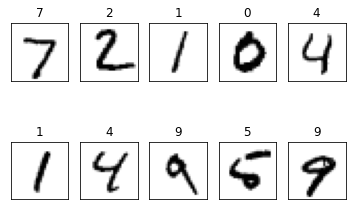

In [145]:
fig=plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1) #정답이 맞는지 2*5 칸 만들거임
    subplot.set_xticks([]) #x로 점점
    subplot.set_yticks([])
    subplot.set_title('{:d}'.format(np.argmax(labels[i])))
    subplot.imshow(mnist.test.images[i].reshape((28,28)),cmap=plt.cm.gray_r)
plt.show()

## tensorflow 1.x CNN

In [146]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [147]:
from tensorflow.examples.tutorials.mnist import input_data

In [148]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E6801D26C8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E68042CE88>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E68043B548>)

In [149]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [150]:
np.set_printoptions(linewidth=1000)

In [151]:
mnist.train.images[0].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

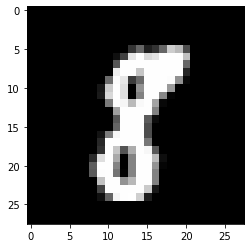

In [152]:
plt.imshow(mnist.train.images[0].reshape((28,28)),cmap=plt.cm.gray)

In [155]:
mnist.train.labels[0]
#array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
#       0   1   2   3   4   5  6   7    8   9

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [170]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])  # [None, width, height, gray(흑백)]

Y = tf.placeholder(tf.float32, [None, 10])  # 10 = 0,1,2,3,4,5,6,7,8,9

keep_prob = tf.placeholder(tf.float32)

# 3 by 3 filter,흑백, 32 filters
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))

from tensorflow import nn

L1 = nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME') #paddiing안하면 24*24.
# 원본 이미지 유지하고싶으면 padding='SAME'

L1 = nn.relu(L1)
L1 = nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')
L1 = nn.dropout(L1, keep_prob)
#케라스에 다음과 같은 것에 대응
#model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

In [171]:
# 3 by 3 filter,흑백, 32 filters 가 들어와서 64개 필터로 나간다
W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
L2=nn.conv2d(L1,W2,strides=[1,1,1,1], padding="SAME")
L2 = nn.relu(L2)
L2 = nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L2 = nn.dropout(L2, keep_prob)

#model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
#model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.25))



In [180]:
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
# keras의 Flatten(), 7 * 7 * 64 (3 dimension) ==> 3136 (1 demension)
L3=tf.reshape(L2,[-1,7*7*64])
#               자동게산

L3=tf.matmul(L3,W3)
L3=nn.relu(L3)
L3=nn.dropout(L3,keep_prob)

#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))

In [181]:
W4=tf.Variable(tf.random_normal([256,10],stddev=0.01))
model = tf.matmul(L3,W4)
#model.add(Dense(10, activation='softmax'))

In [182]:
cost=tf.reduce_mean(nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

In [183]:
optimizer=tf.train.AdamOptimizer(0.001).minimize(cost)

In [184]:
sess=tf.Session()

In [185]:
sess.run(tf.global_variables_initializer())

In [186]:
total_batch=int(mnist.train.num_examples/batch_size)

In [187]:
from tqdm import trange

In [190]:
for epoch in trange(15):
    total_cost=0
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        batch_xs=batch_xs.reshape(-1,28,28,1)
        _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs, Y:batch_ys,keep_prob:0.7})
        total_cost+=cost_val
    print(f"epoch:{epoch:04d} avg.cost:{(total_cost/total_batch):.3f}")
print('train finish!!')

  7%|█████▌                                                                             | 1/15 [00:29<06:57, 29.84s/it]

epoch:0000 avg.cost:0.027


 13%|███████████                                                                        | 2/15 [00:59<06:27, 29.80s/it]

epoch:0001 avg.cost:0.024


 20%|████████████████▌                                                                  | 3/15 [01:28<05:56, 29.68s/it]

epoch:0002 avg.cost:0.023


 27%|██████████████████████▏                                                            | 4/15 [01:58<05:26, 29.69s/it]

epoch:0003 avg.cost:0.023


 33%|███████████████████████████▋                                                       | 5/15 [02:31<05:05, 30.55s/it]

epoch:0004 avg.cost:0.020


 40%|█████████████████████████████████▏                                                 | 6/15 [03:01<04:34, 30.49s/it]

epoch:0005 avg.cost:0.022


 47%|██████████████████████████████████████▋                                            | 7/15 [03:30<04:00, 30.01s/it]

epoch:0006 avg.cost:0.020


 53%|████████████████████████████████████████████▎                                      | 8/15 [03:59<03:27, 29.71s/it]

epoch:0007 avg.cost:0.017


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [04:28<02:57, 29.53s/it]

epoch:0008 avg.cost:0.018


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [04:57<02:27, 29.48s/it]

epoch:0009 avg.cost:0.016


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [05:27<01:57, 29.50s/it]

epoch:0010 avg.cost:0.016


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [05:56<01:28, 29.36s/it]

epoch:0011 avg.cost:0.017


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [06:25<00:58, 29.32s/it]

epoch:0012 avg.cost:0.016


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [06:54<00:29, 29.24s/it]

epoch:0013 avg.cost:0.014


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [07:23<00:00, 29.60s/it]

epoch:0014 avg.cost:0.015
train finish!!


In [191]:
is_correct=tf.equal(tf.argmax(model,1),tf.argmax(Y,1))

In [192]:
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [195]:
print("test acc:{:.3f}".format(sess.run(accuracy,
                                       feed_dict={X:mnist.test.images.reshape(-1,28,28,1),
                                                 Y:mnist.test.labels,
                                                 keep_prob:1})))
#test acc:0.992
#DNN->CNN으로 바꾸었더니 1퍼센트가 올라감

test acc:0.992


In [196]:
sess.close()

## tensorflow autoencoder

In [197]:

# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [198]:
from tensorflow.examples.tutorials.mnist import input_data

In [203]:
mnist=input_data.read_data_sets('mnist/data',one_hot=True) # y data가 자동적으로 바뀌게 함

Extracting mnist/data\train-images-idx3-ubyte.gz
Extracting mnist/data\train-labels-idx1-ubyte.gz
Extracting mnist/data\t10k-images-idx3-ubyte.gz
Extracting mnist/data\t10k-labels-idx1-ubyte.gz


In [204]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [206]:
#여러 옵션들 설정
learning_rate=0.01
train_epoch=20
batch_size=100
n_hidden=256
n_input=28*28

In [207]:
X=tf.placeholder(tf.float32, [None, n_input])

In [210]:
#가중치
#인코더로 들어가서 디코더로 나가는
W_encode=tf.Variable(tf.random_normal([n_input,n_hidden])) #[784,256]

In [211]:
b_encode=tf.Variable(tf.random_normal([n_hidden])) #256

In [212]:
from tensorflow import nn

In [216]:
encoder=nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode)) #XW+b

In [217]:
#decoder
W_decode=tf.Variable(tf.random_normal([n_hidden,n_input])) #[256,784]

In [219]:
b_decode=tf.Variable(tf.random_normal([n_input])) #[784] n_input이랑 동일하게 

In [220]:
model=nn.sigmoid(tf.add(tf.matmul(encoder,W_decode),b_decode)) #XW+b

In [221]:
cost=tf.reduce_mean(tf.pow(X-model,2)) #mse code. 예측값에서 정답 빼고 제곱한 평균.
#                     제곱

In [222]:
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [223]:
sess=tf.Session()

In [224]:
sess.run(tf.global_variables_initializer())

In [225]:
total_batch=int(mnist.train.num_examples/batch_size)

In [226]:
from tqdm import trange

In [229]:
%%time
for epoch in trange(train_epoch):
    total_cost=0
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs}) #왜 정답이 없?
        total_cost+=cost_val
    print(f"epoch:{(epoch+1):04d} avg. cost: {(total_cost/total_batch):.3f}")
print('끄읏!')

  5%|████▏                                                                              | 1/20 [00:02<00:56,  2.99s/it]

epoch:0001 avg. cost: 0.191


 10%|████████▎                                                                          | 2/20 [00:05<00:53,  2.96s/it]

epoch:0002 avg. cost: 0.052


 15%|████████████▍                                                                      | 3/20 [00:08<00:48,  2.87s/it]

epoch:0003 avg. cost: 0.043


 20%|████████████████▌                                                                  | 4/20 [00:10<00:43,  2.74s/it]

epoch:0004 avg. cost: 0.038


 25%|████████████████████▊                                                              | 5/20 [00:14<00:42,  2.85s/it]

epoch:0005 avg. cost: 0.034


 30%|████████████████████████▉                                                          | 6/20 [00:16<00:39,  2.84s/it]

epoch:0006 avg. cost: 0.030


 35%|█████████████████████████████                                                      | 7/20 [00:20<00:40,  3.13s/it]

epoch:0007 avg. cost: 0.028


 40%|█████████████████████████████████▏                                                 | 8/20 [00:23<00:36,  3.02s/it]

epoch:0008 avg. cost: 0.027


 45%|█████████████████████████████████████▎                                             | 9/20 [00:25<00:29,  2.68s/it]

epoch:0009 avg. cost: 0.027


 50%|█████████████████████████████████████████                                         | 10/20 [00:27<00:24,  2.46s/it]

epoch:0010 avg. cost: 0.026


 55%|█████████████████████████████████████████████                                     | 11/20 [00:29<00:21,  2.40s/it]

epoch:0011 avg. cost: 0.025


 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:32<00:20,  2.55s/it]

epoch:0012 avg. cost: 0.024


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [00:35<00:18,  2.63s/it]

epoch:0013 avg. cost: 0.024


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [00:37<00:15,  2.65s/it]

epoch:0014 avg. cost: 0.024


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [00:40<00:13,  2.68s/it]

epoch:0015 avg. cost: 0.024


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [00:42<00:10,  2.54s/it]

epoch:0016 avg. cost: 0.024


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:45<00:07,  2.50s/it]

epoch:0017 avg. cost: 0.024


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:47<00:04,  2.44s/it]

epoch:0018 avg. cost: 0.024


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:50<00:02,  2.49s/it]

epoch:0019 avg. cost: 0.023


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:53<00:00,  2.68s/it]

epoch:0020 avg. cost: 0.023
끄읏!
Wall time: 53.5 s


## 생성한 결과 가지고 그림 그리기

In [231]:
sample_size=10
samples=sess.run(model,feed_dict={X:mnist.test.images[:sample_size]})

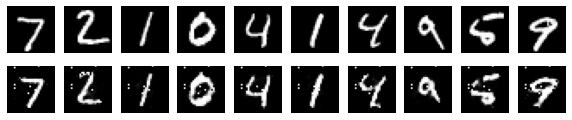

In [238]:
fig,ax = plt.subplots(2,sample_size,figsize=(sample_size,2))
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)),cmap=plt.cm.gray) #784=>28*28
    ax[1][i].imshow(np.reshape(samples[i],(28,28)),cmap=plt.cm.gray)
plt.show()
#완벽하지 않지만 데이터 잘 처리함.